In [15]:
import cv2
from skimage import measure
from skimage.filters import sobel, roberts
import PIL
import numpy as np
import matplotlib.pyplot as plt
import os
from IPython.display import Image, display
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# File path to the image
Test_img_path = "/kaggle/input/butterfly-images40-species/test"
Train_img_path = "/kaggle/input/butterfly-images40-species/train"

categories = ['ADONIS', 'AFRICAN GIANT SWALLOWTAIL','AMERICAN SNOOT','AN 88','APPOLLO','ARCIGERA FLOWER MOTH','ATALA','ATLAS MOTH']

In [16]:
def preprocess_image(image_path):
    # Load the image using OpenCV
    image = cv2.imread(image_path)

    # Convert the image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply median blur for denoising
    denoised_image = cv2.medianBlur(gray_image, 3)

    # Apply Sobel filter for edge detection
    sobel_x = cv2.Sobel(denoised_image, cv2.CV_64F, 1, 0, ksize=3)
    sobel_y = cv2.Sobel(denoised_image, cv2.CV_64F, 0, 1, ksize=3)
    sobel_combined = cv2.magnitude(sobel_x, sobel_y)
    histogram, _ = np.histogram(sobel_combined, bins=256, range=(0, 256))

    # Find a valley or peak in the histogram for thresholding
    # You can adjust this threshold selection method based on your images
    threshold_value = np.argmax(histogram[50:]) + 50

    # Apply binary thresholding
    _, binary_image = cv2.threshold(sobel_combined, threshold_value, 255, cv2.THRESH_BINARY)

    # Find contours using skimage
    contours = measure.find_contours(binary_image, 0.8)

    # Draw contours on the original image
    contour_image = np.copy(image)
    for contour in contours:
        contour = np.flip(contour, axis=1)  # skimage uses (row, column) coordinates
        cv2.polylines(contour_image, [contour.astype(np.int32)], isClosed=True, color=(0, 255, 0), thickness=2)

    return contour_image

In [18]:
# Preprocess Training Images and store them in a numpy array
training_images = []
training_labels = []
for category in categories:
    category_path = os.path.join(Train_img_path, category)

    for image_filename in os.listdir(category_path):
        image_path = os.path.join(category_path, image_filename)

         # Check if the image format is supported (e.g., 'jpg', 'jpeg', 'png')
        supported_formats = ('.jpg', '.jpeg', '.png')
        if image_path.lower().endswith(supported_formats):

            # Apply preprocessing to the image
            preprocessed_image = preprocess_image(image_path)

            # Append the preprocessed image and its label to the arrays
            training_images.append(preprocessed_image)
            training_labels.append(categories.index(category))

# Convert lists to numpy arrays
training_images = np.array(training_images)
training_labels = np.array(training_labels)

In [19]:
print(training_images.shape)
print(training_labels.shape)

(999, 224, 224, 3)
(999,)


In [22]:
# Feature vectors (flattened image features) and labels
X = training_images.reshape(len(training_images), -1)
y = training_labels

In [23]:
print(X.shape)
print(y.shape)

(999, 150528)
(999,)


In [24]:
# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
from sklearn.ensemble import RandomForestClassifier

#Using Random forest
RFC = RandomForestClassifier(n_estimators=100, random_state=42)
RFC.fit(X_train, y_train)

# Predictions on the test set
y_pred = RFC.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=categories)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)

Accuracy: 0.65
Classification Report:
                            precision    recall  f1-score   support

                   ADONIS       0.47      0.58      0.52        24
AFRICAN GIANT SWALLOWTAIL       0.82      0.88      0.85        16
           AMERICAN SNOOT       0.75      0.56      0.64        27
                    AN 88       0.62      0.42      0.50        24
                  APPOLLO       0.74      0.58      0.65        24
     ARCIGERA FLOWER MOTH       0.55      0.55      0.55        29
                    ATALA       0.89      0.93      0.91        27
               ATLAS MOTH       0.54      0.76      0.63        29

                 accuracy                           0.65       200
                macro avg       0.67      0.66      0.66       200
             weighted avg       0.66      0.65      0.65       200



In [26]:
from sklearn.naive_bayes import GaussianNB


GNB = GaussianNB()
GNB.fit(X_train, y_train)

# Predictions on the test set
nb_y_pred = GNB.predict(X_test)

# Evaluate the Naive Bayes model
GNB_accuracy = accuracy_score(y_test, nb_y_pred)
GNB_report = classification_report(y_test, nb_y_pred, target_names=categories)

print("Naive Bayes Accuracy:", GNB_accuracy)
print("Naive Bayes Classification Report:\n", GNB_report)

Naive Bayes Accuracy: 0.565
Naive Bayes Classification Report:
                            precision    recall  f1-score   support

                   ADONIS       0.62      0.54      0.58        24
AFRICAN GIANT SWALLOWTAIL       0.44      0.75      0.56        16
           AMERICAN SNOOT       0.43      0.74      0.55        27
                    AN 88       0.54      0.29      0.38        24
                  APPOLLO       0.57      0.33      0.42        24
     ARCIGERA FLOWER MOTH       0.67      0.34      0.45        29
                    ATALA       0.95      0.70      0.81        27
               ATLAS MOTH       0.55      0.83      0.66        29

                 accuracy                           0.56       200
                macro avg       0.60      0.57      0.55       200
             weighted avg       0.61      0.56      0.55       200



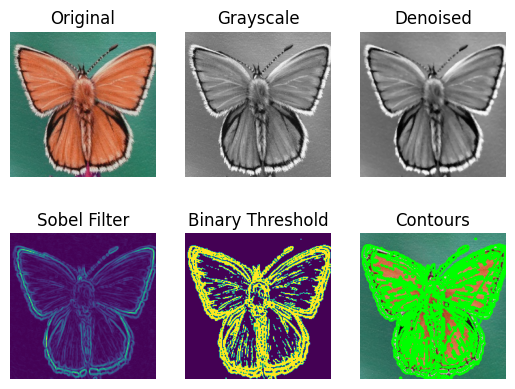

In [28]:
import cv2
import numpy as np
from skimage import measure
import matplotlib.pyplot as plt

# Load your image (replace 'your_image.jpg' with the actual file path)
image = cv2.imread('/kaggle/input/butterfly-images40-species/test/ADONIS/3.jpg')

# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply median blur for denoising
denoised_image = cv2.medianBlur(gray_image, 3)

# Apply Sobel filter
sobel_x = cv2.Sobel(denoised_image, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(denoised_image, cv2.CV_64F, 0, 1, ksize=3)
sobel_combined = cv2.magnitude(sobel_x, sobel_y)
histogram, _ = np.histogram(sobel_combined, bins=256, range=(0, 256))

# Find a valley or peak in the histogram for thresholding
# You can adjust this threshold selection method based on your images
threshold_value = np.argmax(histogram[50:]) + 50

# Apply binary thresholding
_, binary_image = cv2.threshold(sobel_combined, threshold_value, 255, cv2.THRESH_BINARY)

# Find contours using skimage
contours = measure.find_contours(binary_image, 0.8)

# Draw contours on the original image
contour_image = np.copy(image)
for contour in contours:
    contour = np.flip(contour, axis=1)  # skimage uses (row, column) coordinates
    cv2.polylines(contour_image, [contour.astype(np.int32)], isClosed=True, color=(0, 255, 0), thickness=2)

# Display the images
images = [image, gray_image, denoised_image, sobel_combined, binary_image, contour_image]
titles = ['Original', 'Grayscale', 'Denoised', 'Sobel Filter', 'Binary Threshold', 'Contours']

for i in range(len(images)):
    plt.subplot(2, 3, i + 1)
    plt.imshow(images[i], cmap='gray' if i in [1, 2] else None)
    plt.title(titles[i])
    plt.axis('off')

plt.show()

